# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [706]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [707]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [708]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [709]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

<AxesSubplot:>

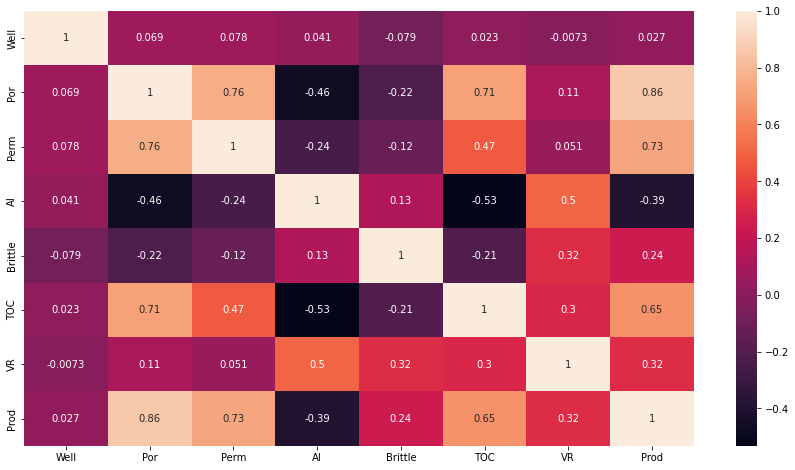

In [710]:
# Ваш код здесь
corr_matrix = data.corr() # корреляционная матрица признаков
# строим тепловую карту матрицы корреляций
fig = plt.figure(figsize=(15,8))
sns.heatmap(data = corr_matrix, annot=True)

In [711]:
# Параметры матрицы корреляции
print('Rank ', np.linalg.matrix_rank(corr_matrix))
print('Determinant ', np.linalg.det(corr_matrix))

Rank  8
Determinant  0.0007299388072652095


> *Ваши выводы здесь*

* Какие факторы сильнее всего коррелируют с целевой переменной?

*С целевой переменной сильнее всего коррелируют признаки: Пористость (Por), Проницаемость (Perm) и общий органический углерод (TOC).*

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

*Определитель матрицы весьма близок к нулю. Матрица корреляции близка к вырожденной, значит она является плохо обусловенной.*

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 

*Чистой коллинеарности между признаками не обнаруживается (максимальный коэффициент 0,76). Но судя по определителю матрицы наблюдений, который близок к нулю, признаки мультиколлинеарны.*

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

*Классическая OLS-модель неприменима для этих данных, так как матрица корреляции близка к вырожденной.*

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [712]:
# Ваш код здесь
A = np.matrix(data.drop(['Prod'], axis=1)) # матрица наблюдений
# добавляем первый столбец, составленный из единиц
A = np.column_stack((np.ones(200), A))
y = data['Prod'] # вектор целевой переменной

In [713]:
# вычислим OLS-оценку для коэффициентов
w = np.linalg.inv(A.T@A)@A.T@y
columns_names = ['_w0_']+list(data.drop(['Prod'], axis=1).columns) # список признаков
# оформляем список коэффициентов в удобный для чтения датафрейм с именами признаков
w_df = pd.DataFrame(data=w, index=columns_names, columns=['Regressor']) 
round(w_df)

,Regressor
_w0_,-1232.0
Well,0.0
Por,230.0
Perm,116.0
AI,-365.0
Brittle,25.0
TOC,-78.0
VR,785.0


> *Ваши выводы здесь*

*Параметр Well неинформативен, так как не оказывает влияния на целевую переменную.*
*Параметр пористость (Por) линейно связан с целевой переменной с коэффициентом 230. Повышение пористости скважины на 1 единицу даёт прирост добычи газа в сутки на 230 млн. кубических футов.
Параметр проницаемость (Perm) также прямо пропорциональна целевой переменной с коэффициентом 116. Повышение проницаемости скважины на 1 единицу даёт прирост добычи газа в сутки на 116 млн. кубических футов.*
*Добыча имеет обратную зависимость от признака Акустический импеданс (AI). Рост импеданса на 1 единицу снижает отдачу скважины на 365 млн. кубических футов.*

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [714]:
# Ваш код здесь
# параметры скважины оформляем в словарь
data_new = {
    'w0' : 1, # добавляем множитель для нулевого коэффициента
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
# делаем прогноз
production_new = 0 
for i in range(len(w)): # перемножаем параметры скважины на коэффициенты регрессии
    production_new += w[i] * list(data_new.values())[i]
print('New prediction: ', round(production_new,6), ' mmcfd')
print('Absolute error of new prediction: ', round(np.abs(4748.315024 - round(production_new,6)),1), ' mmcfd')

New prediction:  4723.064054  mmcfd
Absolute error of new prediction:  25.3  mmcfd


In [715]:
# делаем прогноз для всех данных матрицы наблюдений
prediction = np.array([]) # создаем пустой вектор предсказаний
for i in range(A.shape[0]): # для каждой строки матрицы наблюдений вычисляем прогноз
    p = 0
    for j in range(A.shape[1]): # проходим по столбцам признаков, умножаем величину признака на соответствующий коэффициент регрессии
        p += w[j] * A[i,j]      # все суммируем 
    prediction = np.append(prediction, p) # добавляем полученный прогноз в вектор предсказаний
# считаем среднее абсолютное отклонение в процентах — MAPE (Mean Absolute Percent Error)
deviance = (prediction - y) / y # измеряем отклонение для каждого прогноза и делим на истинное значение
MAPE = np.mean(np.abs(deviance)) * 100 # считаем среднее отклонение
# посчитаем коэффициент детерминации R2
sq_deviance = (prediction - y) ** 2 # квадрат отклонения для каждого прогноза
MSE = np.mean(sq_deviance) # среднее квадратичное отклонение
M = np.mean(y) # среднее по вектору правильных ответов
sq_mean_deviance = (prediction - M) ** 2 # квадрат отклонения от среднего для каждого прогноза
MSE_mean = np.mean(sq_mean_deviance) # среднее квадратичное отклонение от среднего
R2 = 1 - MSE / MSE_mean
print('MAPE: ', round(MAPE,2), '%')
print('R2: ', round(R2,2))

MAPE:  3.63 %
R2:  0.96


> *Ваши выводы здесь*

*Ошибка для выбранной скважины составила 25.3 млн.куб.футов в день. Что в сравнении с общей выработкой в 4723 млн. куб.футов выглядит небольшой.*

*В среднем для всей матрицы наблюдений модель ошибается на +/- 3.6 %.*
*Коэффициент детерминации достигает 0.96, это показывает долю разнообразия (дисперсии), которую смогла уловить модель в данных. Это высокий показатель. Наша модель даёт достаточно точный прогноз на тренировочной выборке.*

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [716]:
# Ваш код здесь
# совместим для наглядности коэффициенты регрессии и коэффициенты корреляции
S = pd.merge( round(w_df[1:],2), corr_matrix['Prod'][:7], left_index=True,right_index=True)
S

,Regressor,Prod
Well,0.05,0.026817
Por,230.18,0.861910
Perm,116.24,0.727426
AI,-365.20,-0.390835
Brittle,24.99,0.237155
TOC,-78.40,0.654445
VR,785.26,0.323182


> *Ваши выводы здесь*

*Согласно матрице корреляций параметр TOC (общий органический углерод (%)) прямо пропорционален добыче. Однако коффициент регрессии для этого признака отрицателен (-78). По логике рост следов углерода должен повышать отдачу скважины, но модель дает обратный прогноз.*

*Противоречие результатов связано с наличием мультиколлинеарности в признаках. Коэффициенты линейной регрессии склонны к неустойчивости.*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [717]:
# Ваш код здесь
# готовим матрицу наблюдений, исключая сильно скоррелированные признаки Perm, TOC. Удаляем неинформативный признак Well
A = np.matrix(data.drop(['Prod','Well','Perm','TOC'], axis=1)) 
# добавляем первый столбец, составленный из единиц
A = np.column_stack((np.ones(200), A))
y = data['Prod'] # вектор целевой переменной
# вычислим OLS-оценку для коэффициентов
w = np.linalg.inv(A.T@A)@A.T@y
columns_names = ['_w0_']+list(data.drop(['Prod','Well','Perm','TOC'], axis=1).columns) # список признаков
# оформляем список коэффициентов в удобный для чтения датафрейм с именами признаков
w_df = pd.DataFrame(data=w, index=columns_names, columns=['Regressor'])

# делаем прогноз с использованием новой модели для всех данных матрицы наблюдений
prediction = np.array([]) # создаем пустой вектор предсказаний
for i in range(A.shape[0]): # для каждой строки матрицы наблюдений вычисляем прогноз
    p = 0
    for j in range(A.shape[1]): # проходим по столбцам признаков, умножаем величину признака на соответствующий коэффициент регрессии
        p += w[j] * A[i,j]      # все суммируем 
    prediction = np.append(prediction, p) # добавляем полученный прогноз в вектор предсказаний
# считаем среднее абсолютное отклонение в процентах — MAPE (Mean Absolute Percent Error)
deviance = (prediction - y) / y # измеряем отклонение для каждого прогноза и делим на истинное значение
MAPE = np.mean(np.abs(deviance)) * 100 # считаем среднее отклонение
# посчитаем коэффициент детерминации R2
sq_deviance = (prediction - y) ** 2 # квадрат отклонения для каждого прогноза
MSE = np.mean(sq_deviance) # среднее квадратичное отклонение
M = np.mean(y) # среднее по вектору правильных ответов
sq_mean_deviance = (prediction - M) ** 2 # квадрат отклонения от среднего для каждого прогноза
MSE_mean = np.mean(sq_mean_deviance) # среднее квадратичное отклонение от среднего
R2 = 1 - MSE / MSE_mean
print('MAPE: ', round(MAPE,2), '%')
print('R2: ', round(R2,2))

MAPE:  4.04 %
R2:  0.94


In [718]:
# Ваш код здесь
# совместим для наглядности коэффициенты регрессии и коэффициенты корреляции
S = pd.merge( round(w_df[1:],2), corr_matrix['Prod'][:7], left_index=True,right_index=True)
S

,Regressor,Prod
Por,293.04,0.861910
AI,-200.03,-0.390835
Brittle,27.64,0.237155
VR,517.40,0.323182


> *Ваши выводы здесь*

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.

*Признак пористости Por стал более значим. Прирост на единицу дает рост прогноза добычи на 293 млн.куб.футов в день.
Признак акустического импеданса AI стал менее значим. Прирост признака на единицу дает убывание прогноза добычи на 200 млн.куб.футов в день.*


* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее.

*Метрика MAPE увеличилась с 3.6 до 4 %. Ошибка модели незначительно выросла. Коэф. детерминации снизился также незначительно. В целом качество модели на тренировочной выборке незначительно ухудшилось*


* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

*Противоречий коэффициентов линейной регрессии и коэффициентов корреляции в данном случае не наблюдается.*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [719]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [720]:
# готовим обучающую выборку и вектор целевой переменной
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data['Prod']
# обучаем модель
lr = LinearRegression()
lr.fit(X, y)
print( np.round(lr.coef_))
# делаем предсказание и рассчитываем метрики
y_pred = lr.predict(X)
print('MAPE ', round(metrics.mean_absolute_percentage_error(y_pred, y) * 100,2), '%')
print('R2_score ', round(metrics.r2_score(y_pred, y),2) )
# заполняем табличку с результатами для задания 8.5
pivot_table = pd.DataFrame()
pivot_table = pivot_table.append(pd.Series(['LinearRegression','','Нет',round(metrics.mean_absolute_percentage_error(y_pred, y) * 100,2)]), ignore_index=True)

[ 293. -200.   28.  517.]
MAPE  4.06 %
R2_score  0.94


C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_92992\1879890806.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.Series(['LinearRegression','','Нет',round(metrics.mean_absolute_percentage_error(y_pred, y) * 100,2)]), ignore_index=True)


> *Ваши выводы здесь*

*Результаты, полученные с использованием библиотеки sklearn практически идентичны полученным ранее с помощью библиотеки numpy.*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [721]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [722]:
# Ваш код здесь
# готовим обучающую выборку и вектор целевой переменной
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data['Prod']
# стандартизируем факторы
st_sc = StandardScaler()
X = st_sc.fit_transform(X)
print(X.shape)
# генерируем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
print(X.shape)
# обучаем модель
lr = LinearRegression()
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
# заполняем табличку с результатами для задания 8.5
pivot_table = pivot_table.append(pd.Series(['LinearRegression','','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)

(200, 4)
(200, 34)
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_92992\2470962474.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.Series(['LinearRegression','','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)


> *Ваши выводы здесь*

*Метрика MAPE гораздо лучше в сравнении с предыдущим результатом. Но наблюдается переобучение, есть существенная разница усреднённых метрик на тренировочных и валидационных выборках.*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [723]:
# Ваш код здесь
# готовим обучающую выборку и вектор целевой переменной
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data['Prod']
# стандартизируем факторы
scaler = StandardScaler()
X = scaler.fit_transform(X)
# генерируем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# оценка коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=6, max_iter=10000)
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
# заполняем табличку с результатами для задания 8.5
pivot_table = pivot_table.append(pd.Series(['L1-регуляризация, Lasso','alpha=6','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)

MAPE на тренировочных фолдах: 1.85 %
MAPE на валидационных фолдах: 2.28 %


C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_92992\2174311931.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.Series(['L1-регуляризация, Lasso','alpha=6','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)


In [724]:
# подбор гиперпараметров методом  RandomizedSearchCV           
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'alpha': list(np.linspace(1, 10, 10, dtype=float))},

random_search = RandomizedSearchCV(
    estimator=Lasso(max_iter=10000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 188 ms
Wall time: 4.01 s
Наилучшие значения гиперпараметров: {'alpha': 6.0}


> *Ваши выводы здесь*

*С помощью метода L1-регуляризации удалось сократить разницу в метриках на тренировочной и валидационных выборках (с 0,91% до 0,43%)*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [725]:
# Ваш код здесь
# готовим обучающую выборку и вектор целевой переменной
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data['Prod']
# стандартизируем факторы
scaler = StandardScaler()
X = scaler.fit_transform(X)
# генерируем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# оценка коэффициентов регрессии с помощью L1-регуляризации
ridge = Ridge(alpha=0.8, solver='svd', random_state=42, max_iter=10000)
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
# заполняем табличку с результатами для задания 8.5
pivot_table = pivot_table.append(pd.Series(['L2-регуляризация (Ridge)','alpha=0.8, solver=svd','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)

MAPE на тренировочных фолдах: 1.81 %
MAPE на валидационных фолдах: 2.70 %


C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_92992\596460575.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.Series(['L2-регуляризация (Ridge)','alpha=0.8, solver=svd','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)


In [726]:
# подбор гиперпараметров методом  RandomizedSearchCV           
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'alpha': list(np.linspace(0.1, 1, 10, dtype=float)),
                       'solver': ['svd','sag','auto']},


random_search = RandomizedSearchCV(
    estimator=Ridge(random_state=42, max_iter=10000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 30, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 297 ms
Wall time: 547 ms
Наилучшие значения гиперпараметров: {'solver': 'svd', 'alpha': 0.8}


> *Ваши выводы здесь*

*Несмотря на небольшое улучшение ошибки на тренировочных выборках, модель Ridge показала ухудшение результатов на валидационных фолдах. Модель склонна к переобучению.*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [727]:
# Ваш код здесь
# готовим обучающую выборку и вектор целевой переменной
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data['Prod']
# стандартизируем факторы
scaler = StandardScaler()
X = scaler.fit_transform(X)
# генерируем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# оценка коэффициентов регрессии с помощью ElasticNet
elasticnet = ElasticNet(alpha=6, l1_ratio=1, random_state=42, max_iter=10000)
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(elasticnet, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
# заполняем табличку с результатами для задания 8.5
pivot_table = pivot_table.append(pd.Series(['ElasticNet','alpha=6, l1_ratio=1','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)

MAPE на тренировочных фолдах: 1.85 %
MAPE на валидационных фолдах: 2.28 %


C:\Users\Ustenko-S\AppData\Local\Temp\ipykernel_92992\2648130888.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pivot_table = pivot_table.append(pd.Series(['ElasticNet','alpha=6, l1_ratio=1','Да',-cv_results['train_score'].mean()* 100,-cv_results['test_score'].mean() * 100]), ignore_index=True)


In [728]:
# подбор гиперпараметров методом  RandomizedSearchCV           
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'alpha': list(np.linspace(1, 10, 10, dtype=float)),
                       'l1_ratio': list(np.linspace(0.1, 1, 10, dtype=float))},


random_search = RandomizedSearchCV(
    estimator=ElasticNet(random_state=42, max_iter=10000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 100, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 484 ms
Wall time: 617 ms
Наилучшие значения гиперпараметров: {'l1_ratio': 1.0, 'alpha': 6.0}


> *Ваши выводы здесь*

*Подбор параметров методом Randomized Search показал наилучшие результаты при L1_ratio = 1. Это значит, что для данной модели оптимальна L1-регуляризация (Lasso). Результаты аналогичны полученным в задании 8.2.*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [729]:
# Ваш код здесь
pivot_table.rename( columns={0:'Наименование модели',1:'Гиперпараметры', 2:'Полином. признаки', 3:'MAPE_train', 4:'MAPE_valid'}, inplace=True)
pivot_table

,Наименование модели,Гиперпараметры,Полином. признаки,MAPE_train,MAPE_valid
0,LinearRegression,,Нет,4.060000,NaN
1,LinearRegression,,Да,1.773240,2.680875
2,"L1-регуляризация, Lasso",alpha=6,Да,1.849407,2.280354
3,L2-регуляризация (Ridge),"alpha=0.8, solver=svd",Да,1.809915,2.701975
4,ElasticNet,"alpha=6, l1_ratio=1",Да,1.849407,2.280354


> *Ваши выводы здесь*

*Наилучшие результаты с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности показала модель линейной регрессии с полиномиальными признаками 3-го порядка с L1-регуляризацией с коэффициентом 6*